<a href="https://colab.research.google.com/github/Inshalmunaf/Deep_Learning_Project1/blob/main/DeepLearning__Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'cats-and-dogs-image-classification' dataset.
Path to dataset files: /kaggle/input/cats-and-dogs-image-classification


In [31]:
import os
import pandas as pd
import numpy as np
import cv2

In [32]:
Test_path = os.path.join(path,'test')
Train_path = os.path.join(path,'train')


In [33]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D , MaxPool2D ,Dense, Flatten , BatchNormalization , Dropout

In [34]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = Train_path,
    labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = Test_path,
    labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [35]:
#Normalize
def process(image , label):
  image = tf.cast(image/255 , tf.float32)
  return image,label

test_ds = test_ds.map(process)
train_ds = train_ds.map(process)


In [36]:
# Model Building
model = Sequential()

model.add(Conv2D( 32 ,kernel_size=(3,3) , padding= 'valid' , activation = 'relu' , input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2) , padding='valid' , strides = 2))

model.add(Conv2D( 64 ,kernel_size=(3,3) , padding= 'valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2) , padding='valid' , strides = 2))

model.add(Conv2D( 128 ,kernel_size=(3,3) , padding= 'valid' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2) , padding='valid' , strides = 2))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64 , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1 , activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [38]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [39]:
history = model.fit(train_ds , epochs= 10  , validation_data = test_ds)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 417ms/step - accuracy: 0.5297 - loss: 12.8921 - val_accuracy: 0.5000 - val_loss: 8.1334
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.5991 - loss: 20.7598 - val_accuracy: 0.5071 - val_loss: 7.0200
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.5577 - loss: 12.6438 - val_accuracy: 0.5000 - val_loss: 12.8550
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - accuracy: 0.6158 - loss: 12.0661 - val_accuracy: 0.4786 - val_loss: 2.7100
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - accuracy: 0.5217 - loss: 11.2197 - val_accuracy: 0.5000 - val_loss: 10.4848
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.5472 - loss: 6.3650 - val_accuracy: 0.5000 - val_loss: 4.1566
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.5851 - loss: 5.5511 - val_accuracy: 0.5000 - val_loss: 4.6300
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - accuracy: 0.5469 - loss: 5.3223 - val_acc

In [40]:
import matplotlib.pyplot as plt

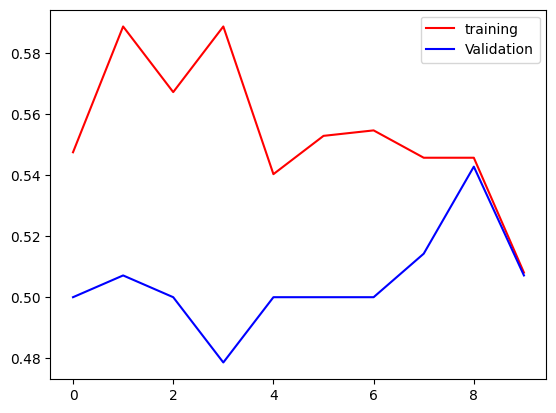

In [41]:
plt.plot(history.history['accuracy'] , color = 'red' ,label = 'training')
plt.plot(history.history['val_accuracy'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()

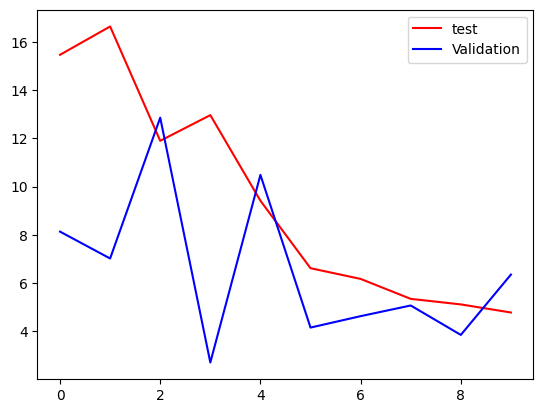

In [42]:
plt.plot(history.history['loss'] , color = 'red' ,label = 'test')
plt.plot(history.history['val_loss'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()

# **Using Pre Trained Model (VGG16)**

In [43]:
from tensorflow.keras.applications import VGG16
# Loading the pretrained model (VGG16)
base_model = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (256,256,3)
)

# Basic Transfer Learning (VGG16) | Dropout & Augmentation Added | **Part A**

In [44]:
# Freezing the base model
base_model.trainable = False

In [45]:
from tensorflow.keras.layers import RandomFlip , RandomRotation ,RandomZoom

In [46]:
# CReating Own Classifier
model_assembled = Sequential([
    # Data Augmentation
    RandomFlip('horizontal', input_shape=(256,256,3)),
    RandomRotation(0.1),
    RandomZoom(0.1),

    base_model,
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
model_assembled.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,909,249 (72.13 MB)

 Trainable params: 4,194,561 (16.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [48]:
from tensorflow.keras.optimizers import Adam
#Compilation of model
model_assembled.compile(
    optimizer= Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [49]:
#Model Building
historyV2 = model_assembled.fit(
    train_ds,
    validation_data=test_ds,
    epochs =10
    )

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - accuracy: 0.5463 - loss: 2.6877 - val_accuracy: 0.6857 - val_loss: 0.5850
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.6988 - loss: 0.5580 - val_accuracy: 0.7214 - val_loss: 0.5008
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - accuracy: 0.8049 - loss: 0.4463 - val_accuracy: 0.7571 - val_loss: 0.4567
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - accuracy: 0.8524 - loss: 0.3629 - val_accuracy: 0.7929 - val_loss: 0.4352
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.8550 - loss: 0.3525 - val_accuracy: 0.7786 - val_loss: 0.4288
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.8803 - loss: 0.3158 - val_accuracy: 0.7786 - val_loss: 0.4390
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 208ms/step - accuracy: 0.8632 - loss: 0.2789 - val_accuracy: 0.7929 - val_loss: 0.4156
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - accuracy: 0.9338 - loss: 0.2510 - val_accuracy: 0.

# Fine Tuning the model(VGG16) | Building pon Part A's model |  **Part B**

In [50]:
# Freezing the base model
base_model.trainable = True

In [51]:
for x in base_model.layers:
  print(x)

<InputLayer name=input_layer_4, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [52]:
#Freezing all layers excet last block(High Level features ) : Block 5
for x in base_model.layers[:-4]:
  x.trainable = False

In [53]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [54]:
model_assembled.compile(
    optimizer = Adam(learning_rate = 1e-5),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [55]:
model_assembled.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,909,249 (72.13 MB)

 Trainable params: 11,273,985 (43.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [56]:
print("Starting to fine tune")
history_fine_tune= model_assembled.fit (
    train_ds,
    validation_data = test_ds,
    epochs= 15,

)

Starting to fine tune
Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step - accuracy: 0.9340 - loss: 0.1896 - val_accuracy: 0.8214 - val_loss: 0.4128
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 229ms/step - accuracy: 0.9428 - loss: 0.1625 - val_accuracy: 0.8357 - val_loss: 0.3952
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - accuracy: 0.9540 - loss: 0.1337 - val_accuracy: 0.8000 - val_loss: 0.4264
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 232ms/step - accuracy: 0.9241 - loss: 0.1634 - val_accuracy: 0.8214 - val_loss: 0.4344
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.9708 - loss: 0.0977 - val_accuracy: 0.8500 - val_loss: 0.3910
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.9613 - loss: 0.1188 - val_accuracy: 0.8357 - val_loss: 0.3878
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - accuracy: 0.9627 - loss: 0.1056 - val_accuracy: 0.8143 - val_loss: 0.4072
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 269ms/step - accuracy: 0.9499 - loss: 0.1

# Graph Plotting Overfitting Checks

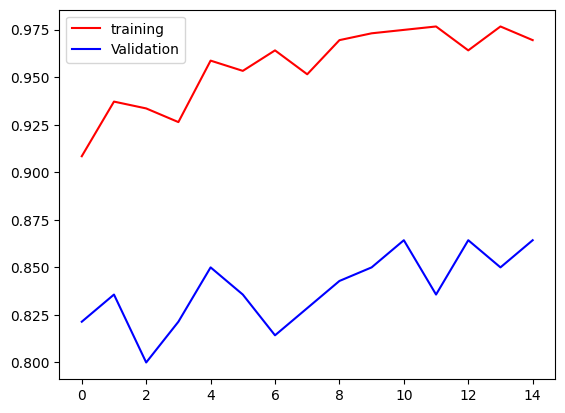

In [57]:
plt.plot(history_fine_tune.history['accuracy'] , color = 'red' ,label = 'training')
plt.plot(history_fine_tune.history['val_accuracy'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()

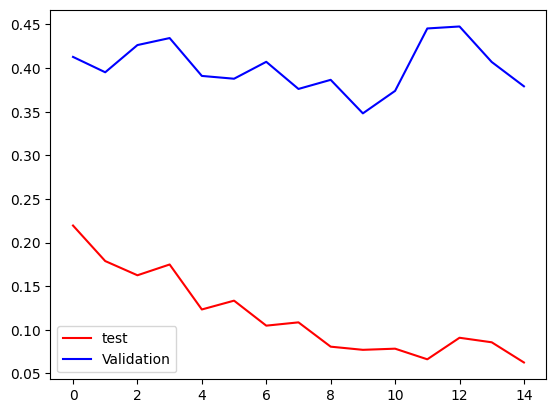

In [58]:
plt.plot(history_fine_tune.history['loss'] , color = 'red' ,label = 'test')
plt.plot(history_fine_tune.history['val_loss'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()

# **Using PreTrained Model (MobileNet)**

In [87]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = Train_path,
    labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = Test_path,
    labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [88]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Flatten , Dense , Input , Lambda , Dropout
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.optimizers import Adam


In [89]:
#Load the model
base_model_MobileNet = MobileNetV2(
    weights="imagenet",
    include_top= False,
    input_shape=(256,256,3)
)

/tmp/ipython-input-2153715800.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_MobileNet = MobileNetV2(


In [90]:
#Freeze the top layers
base_model_MobileNet.trainable= False

In [91]:
#Model Building
model_MobileNet = Sequential([
    Input(shape = (256,256,3)),
    Lambda(tf.keras.applications.mobilenet_v2.preprocess_input),

    #Data Augmentation
    RandomFlip('horizontal'),
    RandomRotation(0.1),
    RandomZoom(0.2),

    base_model_MobileNet,
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.3),
    Dense(1 , activation = 'sigmoid')

])

In [92]:
model_MobileNet.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_5 (Lambda)               │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_6 (RandomFlip)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_6               │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_6 (RandomZoom)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 81920)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │    10,485,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,744,001 (48.61 MB)

 Trainable params: 10,486,017 (40.00 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [93]:
#Model Compilation
model_MobileNet.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [94]:
#Model running
history_Mobilenet = model_MobileNet.fit(
    train_ds,
    validation_data=test_ds,
    epochs=15
)

Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 221ms/step - accuracy: 0.7778 - loss: 3.6576 - val_accuracy: 0.9143 - val_loss: 2.0414
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step - accuracy: 0.9418 - loss: 1.0815 - val_accuracy: 0.9429 - val_loss: 0.7986
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.9692 - loss: 0.2378 - val_accuracy: 0.9500 - val_loss: 0.1108
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.9722 - loss: 0.2441 - val_accuracy: 0.9429 - val_loss: 0.3070
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.9900 - loss: 0.0637 - val_accuracy: 0.9714 - val_loss: 0.1239
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - accuracy: 0.9798 - loss: 0.1339 - val_accuracy: 0.9429 - val_loss: 0.1812
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.9881 - loss: 0.0539 - val_accuracy: 0.9714 - val_loss: 0.0782
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.9920 - loss: 0.0195 - val_accuracy: 0.

# Graph Plotting for Mobile Net - Overfitting Checks

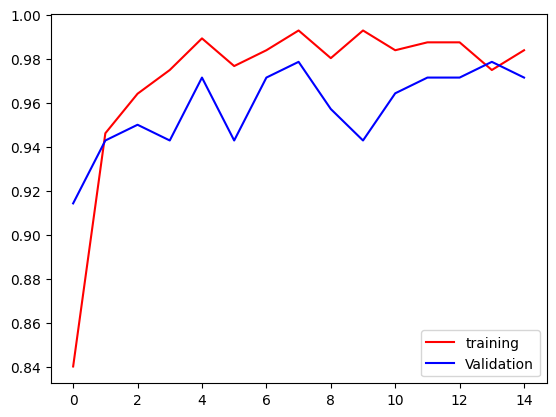

In [98]:
plt.plot(history_Mobilenet.history['accuracy'] , color = 'red' ,label = 'training')
plt.plot(history_Mobilenet.history['val_accuracy'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()

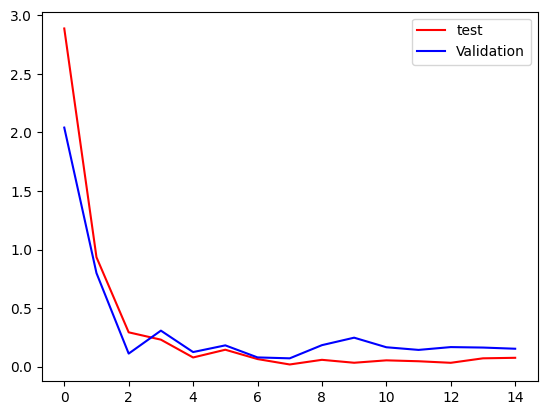

In [99]:
plt.plot(history_Mobilenet.history['loss'] , color = 'red' ,label = 'test')
plt.plot(history_Mobilenet.history['val_loss'] , color = 'blue' ,label = 'Validation')
plt.legend()
plt.show()